# Overview <a id=ov>

1 [Comparison Plots](#dqn)<br>
2 [Tables](#replan_depth)<br>
    

In [5]:
import sys 
import os

sys.path.insert(0, os.path.abspath('../../fabricatio-controls/fabricatio_controls/comparison_utils'))
sys.path.insert(0, os.path.abspath('../1_data/results'))

In [6]:
from importlib import reload 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import result_visualization as rv
reload(rv)

<module 'result_visualization' from 'D:\\1_research\\1_promotion\\2_disertation\\2_code\\fabricatio-rl\\fabricatio-controls\\fabricatio_controls\\comparison_utils\\result_visualization.py'>

## 1 Comparison Plots<a id=dqn>

[Back to Overview](#ov)

In [7]:
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

In [8]:
def read_experiment_dfs(experiment_setup_string):
    full_sims_string = {
        ('sim_search_LPT_LQT_LOR_LQT_'
        'MOR_LQT_SRPT_LQT_LRPT_LQT_'
        'LTPO_LQT_MTPO_LQT_EDD_LQT_'
        'LUDM_LQT_SPT_LQT'): 'SimSearch',
        ('sim_search_LPT_MQT_LPT_LQT_'
        'LPT_MBD_LPT_LQO_LOR_MQT_LOR_'
        'LQT_LOR_MBD_LOR_LQO_MOR_MQT_'
        'MOR_LQT_MOR_MBD_MOR_LQO_SRPT_'
        'MQT_SRPT_LQT_SRPT_MBD_SRPT_'
        'LQO_LRPT_MQT_LRPT_LQT_LRPT_'
        'MBD_LRPT_LQO_LTPO_MQT_LTPO_LQT_'
        'LTPO_MBD_LTPO_LQO_MTPO_MQT_MTPO_'
        'LQT_MTPO_MBD_MTPO_LQO_EDD_MQT_'
        'EDD_LQT_EDD_MBD_EDD_LQO_LUDM_'
        'MQT_LUDM_LQT_LUDM_MBD_LUDM_LQO_'
        'SPT_MQT_SPT_LQT_SPT_MBD_SPT_LQO'): 'PSimSearch',
        ('MCTS8_hLPT-LOR-MOR-SRPT-LRPT-LTPO'
         '-MTPO-EDD-LUDM-SPT-LQT-LQO'): 'MCTS',
        ('MCTS8_hLPT-LOR-MOR-SRPT-LRPT-LTPO'
         '-MTPO-EDD-LUDM-SPT-MQT-LQT-MBD-LQO'): 'MCTS',
        ('MCTS8_hLPT-LOR-MOR-SRPT-LRPT-LTPO-'
         'MTPO-EDD-LUDM-SPT-LQT-LQO'): 'MCTS',
    }
    path_prefix = f'../1_data/results/{experiment_setup_string}'
    partial_dfs = []
    for partial_result in ['DQN&H', 'CP3', 'SimSearch', 'PSimSearch', 
                           'AZlr-4', 'MCTS']:
        df_part = pd.read_csv(
            f'{path_prefix}_{partial_result}__s6000.csv', index_col=0)
        df_part['control_name'] = df_part['control_name'].apply(
            lambda x: full_sims_string[x] if x in full_sims_string else x)
        partial_dfs.append(df_part)
    df = pd.concat(partial_dfs)
    print(np.unique(df['control_name']))
    df.to_csv(f"{path_prefix}_all_controls_s6000.csv")
    return df
        
experiment_setup_string = '1_fjc_10x14(100)'    
# experiment_setup_string = '2_jm_10x14(100)'    
df = read_experiment_dfs(experiment_setup_string)

['AZ' 'CP3' 'EDD_LQT' 'LOR_LQT' 'LPT_LQT' 'LRPT_LQT' 'LTPO_LQT' 'LUDM_LQT'
 'MCTS' 'MOR_LQT' 'MTPO_LQT' 'PSimSearch' 'RandomNowaitFalse'
 'RandomNowaitTrue' 'SPT_LQT' 'SRPT_LQT' 'SimSearch' 'dqn']


In [9]:
def get_wide_df(res_data):
    # res_data = res_data[res_data['control_name'].isin(self.controls)]
    df_res = res_data.pivot_table(
        index='instance', columns='control_name', values='makespan')
    df_res = df_res.reset_index()
    df_res.columns.name = ''
    return df_res

def get_best_control(res_wide, controls):
    return res_wide.apply(lambda row: min(row[controls]), axis=1)

def get_long_df(res_wide, controls):
    idx = 'instance'
    df_result = pd.melt(res_wide, id_vars=[idx],
                        value_vars=controls)
    return df_result.rename(columns={
        'value': 'makespan',
        '': 'control_name'}
    )


controls = [
        'EDD_LQT', 'LOR_LQT', 'LPT_LQT', 'LRPT_LQT', 'LTPO_LQT',
        'LUDM_LQT', 'MOR_LQT', 'MTPO_LQT', 'RandomNowaitFalse',
        'RandomNowaitTrue', 'SPT_LQT', 'SRPT_LQT', 'dqn', 'CP3', 'SimSearch']
res_wide = get_wide_df(df)
res_wide['VBS'] = get_best_control(res_wide, controls)
res_long = get_long_df(res_wide, controls + ['VBS'])

In [10]:
display(res_wide.columns)
display(np.unique(df['control_name']))

Index(['instance', 'AZ', 'CP3', 'EDD_LQT', 'LOR_LQT', 'LPT_LQT', 'LRPT_LQT',
       'LTPO_LQT', 'LUDM_LQT', 'MCTS', 'MOR_LQT', 'MTPO_LQT', 'PSimSearch',
       'RandomNowaitFalse', 'RandomNowaitTrue', 'SPT_LQT', 'SRPT_LQT',
       'SimSearch', 'dqn', 'VBS'],
      dtype='object', name='')

array(['AZ', 'CP3', 'EDD_LQT', 'LOR_LQT', 'LPT_LQT', 'LRPT_LQT',
       'LTPO_LQT', 'LUDM_LQT', 'MCTS', 'MOR_LQT', 'MTPO_LQT',
       'PSimSearch', 'RandomNowaitFalse', 'RandomNowaitTrue', 'SPT_LQT',
       'SRPT_LQT', 'SimSearch', 'dqn'], dtype=object)

In [14]:
import sys 
import os
import pandas as pd
import seaborn as sns
import result_visualization as rv
from matplotlib import pyplot as plt


sns.set_style('whitegrid')
sns.set_context('talk')

control_result_names = {
    'CP3': 'CP3',
    'EDD_LQT': 'EDD',
    'LOR_LQT': 'LOR',
    'LPT_LQT': 'LPT',
    'LRPT_LQT': 'LRPT',
    'LTPO_LQT': 'LTPO',
    'LUDM_LQT': 'LUDM',
    'MOR_LQT': 'MOR',
    'MTPO_LQT': 'MTPO',
    'SPT_LQT': 'SPT',
    'SRPT_LQT': 'SRPT',
    'dqn': 'DQN',
    # 'dqn30': 'DQN30',
    'RandomNowaitTrue': 'RND1',
    'RandomNowaitFalse': 'RND2',
    'SimSearch': 'SimSearch',
    'PSimSearch': 'PSimSearch',
    'AZ':'AZ', 
    'MCTS':'MCTS',
}

slection = [
    'CP3',
    'EDD',
    'LOR',
    'LPT',
    'LRPT',
    'LTPO',
    'LUDM',
    'MOR',
    'MTPO',
    'SPT',
    'SRPT',
    'DQN', 
    # 'DQN30', 
    'SimSearch',
    'PSimSearch',
    'RND1', 
    'RND2', 'AZ', #, 'AZ1'
    'MCTS',
]

heuristic_cmp_selection = [
    'EDD', 'LOR', 'LPT', 'LRPT', 'LTPO', 'LUDM', 
    'MOR', 'MTPO', 'SPT', 'SRPT','DQN', 'AZ'
]

target = 'makespan'
# setup, nr, best_h, ss_name = 'fjc', 1, 'SPT', 'PSimSearch'
setup, nr, best_h, ss_name = 'jm', 2, 'MOR', 'SimSearch'

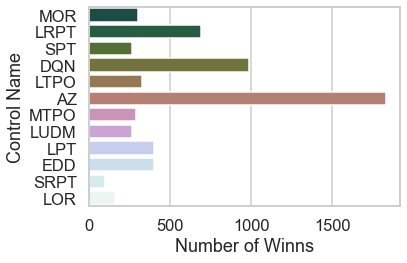

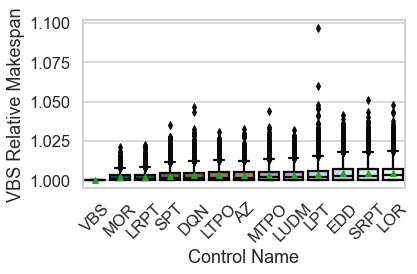

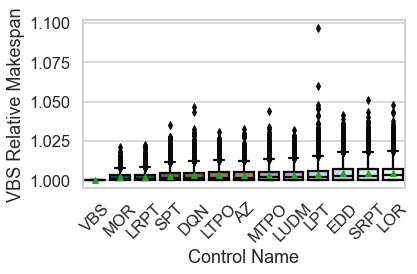

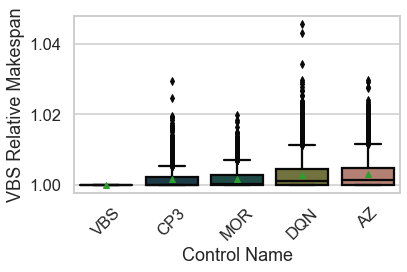

Wall time: 54 s


In [15]:
%%time

data_path = f"../1_data/results/{nr}_{setup}_10x14(100)_all_controls_s6000.csv"

# df = pd.read_csv('../1_data/results/fjc10x10_baselines_s100_v1.csv', index_col=0)
v = rv.ResultVisualization([data_path])
v.select_data(target, control_result_names, control_subset=slection)

_, axes = plt.subplots(1)
v.select_data(target, control_result_names, 
              control_subset=heuristic_cmp_selection)
ax = v.count_winns(ax=axes)
plt.tight_layout()
plt.savefig(f"../1_data/plots/54__vbs_rel_{target}__{setup}_14(100)x10__winns.png", dpi=300, 
            bbox_inches='tight', pad_inches=0.02)
plt.show()
print(f"======================================================================")

_, axes = plt.subplots(1)
v.select_data(target, control_result_names, 
              control_subset=heuristic_cmp_selection #+ ['RND1', 'RND2']
             )
ax = v.get_results_boxplot(ax=axes)
#ax.set_ylim(top=1.050)
plt.tight_layout()
plt.savefig(f"../1_data/plots/54__vbs_rel_{target}__{setup}_14(100)x10__box_1.png", dpi=300, 
            bbox_inches='tight', pad_inches=0.02)
plt.show()
print(f"======================================================================")

_, axes = plt.subplots(1)
v.select_data(target, control_result_names, control_subset=heuristic_cmp_selection)
ax = v.get_results_boxplot(ax=axes)
#ax.set_ylim(top=1.050)
plt.tight_layout()
plt.savefig(f"../1_data/plots/54__vbs_rel_{target}__{setup}_14(100)x10__box_2.png", dpi=300, 
            bbox_inches='tight', pad_inches=0.02)
plt.show()
print(f"======================================================================")

_, axes = plt.subplots(1)
v.select_data(target, control_result_names, control_subset=[
    best_h,
    # 'LOR', 
    # 'MOR', 
    # 'EDD', 'LPT', 'LRPT', 'LTPO', 'LUDM', 'MTPO', 'SRPT',
    'CP3', 'DQN', # 'SimSearch', 
    'AZ'])
v.get_results_boxplot(ax=axes)
plt.tight_layout()
plt.savefig(f"../1_data/plots/54__vbs_rel_{target}__{setup}_14(100)x10__box_3.png", dpi=300, 
            bbox_inches='tight', pad_inches=0.02)
plt.show()
print(f"======================================================================")

In [17]:
def rename_psimsearch(axes, axis='x'):
    ticklabels = axes.get_xticklabels() if axis=='x' else axes.get_yticklabels()
    labels = [l.get_text() for l in ticklabels]
    if 'PSimSearch' in labels:
        i = labels.index('PSimSearch')
        labels[i] = 'SimSearch'
        if axis=='x':
            axes.set_xticklabels(labels)
        else:
            axes.set_yticklabels(labels)

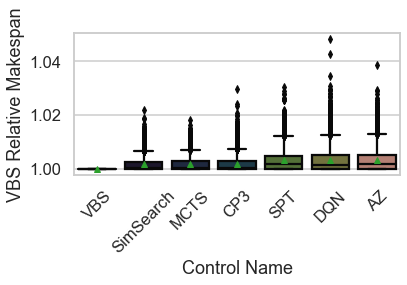

In [18]:
_, axes = plt.subplots(1)
v.select_data(target, control_result_names, control_subset=[
    best_h,
    # 'LOR', 
    # 'MOR', 
    # 'EDD', 'LPT', 'LRPT', 'LTPO', 'LUDM', 'MTPO', 'SRPT',
    'CP3', 'DQN', ss_name,
    'AZ', 'MCTS'])
v.get_results_boxplot(ax=axes)
rename_psimsearch(axes)
plt.tight_layout()
plt.savefig(f"../1_data/plots/54__vbs_rel_{target}__{setup}_14(100)x10__box_4.png", dpi=300, 
            bbox_inches='tight', pad_inches=0.02)
plt.show()
print(f"======================================================================")

### Runtime

In [19]:
reload(rv)

setup, nr, best_h, ssc = 'fjc', 1, 'SPT', 'SimSearch'
#setup, nr, best_h, ssc = 'jm', 2, 'MOR', 'PSimSearch'

experiment_setup_string = f'{nr}_{setup}_10x14(100)'    

df = read_experiment_dfs(experiment_setup_string)
# df.nunique()

['AZ' 'CP3' 'EDD_LQT' 'LOR_LQT' 'LPT_LQT' 'LRPT_LQT' 'LTPO_LQT' 'LUDM_LQT'
 'MCTS' 'MOR_LQT' 'MTPO_LQT' 'PSimSearch' 'RandomNowaitFalse'
 'RandomNowaitTrue' 'SPT_LQT' 'SRPT_LQT' 'SimSearch' 'dqn']


In [20]:
df['control_name'] = df['control_name'].map(lambda x: control_result_names[x])

In [21]:
exclused_controls = ['SimSearch']

group1 = ['AZ', 'CP3', 'DQN', best_h, ssc, 'MCTS']
group2 = ['EDD', 'LOR', 'LPT', 'LRPT', 'LTPO', 'LUDM', 'MOR', 'MTPO', 'SPT', 'SRPT', 'DQN']

In [22]:
from copy import deepcopy

def show_values_on_bars(axs, h_v="v", space=0.4):
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            ResultVisualization._show_on_single_plot(ax, space, h_v)
    else:
        ResultVisualization._show_on_single_plot(axs, space, h_v)
        
colors = deepcopy(v.colors)

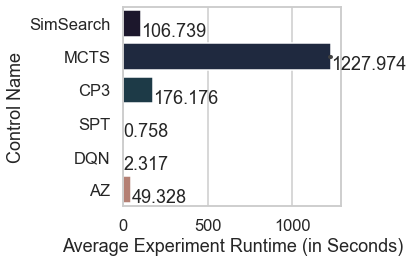

In [23]:
sns.set_style('whitegrid')
sns.set_context('talk')

v.select_data(target, control_result_names, control_subset=group1)
ax = sns.barplot(data=df[df['control_name'].isin(group1)], x='duration', y='control_name', 
                 palette=colors, order=v.control_order.index[1:], orient='h')
# y_ticklabels = ax.get_yticklabels()
# ax.set_xticklabels(y_ticklabels, rotation=45)
ax.set_ylabel("Control Name")
ax.set_xlabel("Average Experiment Runtime (in Seconds)")
v.show_values_on_bars(ax, h_v='h')
rename_psimsearch(ax, axis='y')

plt.tight_layout()
plt.savefig(f"../1_data/plots/54__vbs_rel_{target}__{setup}_14(100)x10__runtime_g1.png", dpi=300, 
            bbox_inches='tight', pad_inches=0.02)
plt.show()

## Tables <a id=replan_depth>
    
[Back to Overview](#ov)

In [24]:
slection

['CP3',
 'EDD',
 'LOR',
 'LPT',
 'LRPT',
 'LTPO',
 'LUDM',
 'MOR',
 'MTPO',
 'SPT',
 'SRPT',
 'DQN',
 'SimSearch',
 'PSimSearch',
 'RND1',
 'RND2',
 'AZ',
 'MCTS']

In [25]:
def get_result_series(nr, setup, target):
    data_path = f"../1_data/results/{nr}_{setup}_10x14(100)_all_controls_s6000.csv"
    v = rv.ResultVisualization([data_path])
    v.select_data(target, control_result_names, control_subset=slection)
    return v.res_wide.mean()

In [26]:
%%time

def build_results_table(target, min_best=True):
    # get data in convenient form
    result_series_fjc = get_result_series(1, 'fjc', target).sort_values(ascending=min_best)
    result_series_jm = get_result_series(2, 'jm', target)[result_series_fjc.index]
    # define string formating functions for relative and absolute result values
    fmt = lambda x: '{:.03f}'.format(x)
    fmt_rel = lambda x: '-' + '{:.03f}'.format(x) + '%'
    # get absolute results
    fjc_vals_abs = (result_series_fjc).map(fmt)
    jm_vals_abs = (result_series_jm).map(fmt)
    # get percentual differences from vbs
    fjc_vals_rel = (100 - result_series_fjc['VBS'] / result_series_fjc * 100).map(fmt_rel)
    jm_vals_rel = (100 - result_series_jm['VBS'] / result_series_jm * 100).map(fmt_rel)
    # build table
    res_table = pd.DataFrame(
        index=result_series_fjc.index, 
        data={
            'FJc': fjc_vals_abs + [' ('] + fjc_vals_rel + [')'],
            'Jm': jm_vals_abs + [' ('] + jm_vals_rel + [')']
        }
    )
    # set index col
    res_table.index.name = 'Control'
    return res_table

all_result_table = build_results_table('makespan')

display(all_result_table)
print(all_result_table.to_latex(escape=True))

,FJc,Jm
Control,,
VBS,6543.362 (-0.000%),11574.535 (-0.000%)
CP3,6543.376 (-0.000%),11600.112 (-0.220%)
PSimSearch,7117.735 (-8.070%),11613.082 (-0.332%)
MCTS,7158.987 (-8.599%),11599.297 (-0.213%)
SimSearch,7239.456 (-9.615%),11598.260 (-0.205%)
AZ,7252.663 (-9.780%),11615.912 (-0.356%)
SPT,7257.879 (-9.845%),11613.443 (-0.335%)
LUDM,7277.637 (-10.089%),11618.944 (-0.382%)
MTPO,7277.757 (-10.091%),11618.321 (-0.377%)


\begin{tabular}{lll}
\toprule
{} &                  FJc &                   Jm \\
Control    &                      &                      \\
\midrule
VBS        &   6543.362 (-0.000\%) &  11574.535 (-0.000\%) \\
CP3        &   6543.376 (-0.000\%) &  11600.112 (-0.220\%) \\
PSimSearch &   7117.735 (-8.070\%) &  11613.082 (-0.332\%) \\
MCTS       &   7158.987 (-8.599\%) &  11599.297 (-0.213\%) \\
SimSearch  &   7239.456 (-9.615\%) &  11598.260 (-0.205\%) \\
AZ         &   7252.663 (-9.780\%) &  11615.912 (-0.356\%) \\
SPT        &   7257.879 (-9.845\%) &  11613.443 (-0.335\%) \\
LUDM       &  7277.637 (-10.089\%) &  11618.944 (-0.382\%) \\
MTPO       &  7277.757 (-10.091\%) &  11618.321 (-0.377\%) \\
DQN        &  7280.755 (-10.128\%) &  11615.028 (-0.349\%) \\
MOR        &  7280.815 (-10.129\%) &  11602.956 (-0.245\%) \\
SRPT       &  7281.439 (-10.136\%) &  11632.794 (-0.501\%) \\
EDD        &  7281.779 (-10.141\%) &  11631.796 (-0.492\%) \\
LOR        &  7285.697 (-10.189\%) &  11634

In [27]:
df = all_result_table.copy()
df = df.sort_values('FJc').drop('Jm', axis=1).reset_index(drop=False)
df.index += 1
print(df.to_latex(escape=True))

\begin{tabular}{lll}
\toprule
{} &     Control &                  FJc \\
\midrule
1  &         VBS &   6543.362 (-0.000\%) \\
2  &         CP3 &   6543.376 (-0.000\%) \\
3  &  PSimSearch &   7117.735 (-8.070\%) \\
4  &        MCTS &   7158.987 (-8.599\%) \\
5  &   SimSearch &   7239.456 (-9.615\%) \\
6  &          AZ &   7252.663 (-9.780\%) \\
7  &         SPT &   7257.879 (-9.845\%) \\
8  &        LUDM &  7277.637 (-10.089\%) \\
9  &        MTPO &  7277.757 (-10.091\%) \\
10 &         DQN &  7280.755 (-10.128\%) \\
11 &         MOR &  7280.815 (-10.129\%) \\
12 &        SRPT &  7281.439 (-10.136\%) \\
13 &         EDD &  7281.779 (-10.141\%) \\
14 &         LOR &  7285.697 (-10.189\%) \\
15 &        LRPT &  7287.514 (-10.211\%) \\
16 &        LTPO &  7294.237 (-10.294\%) \\
17 &         LPT &  7314.608 (-10.544\%) \\
18 &        RND1 &  8805.107 (-25.687\%) \\
19 &        RND2 &  8992.310 (-27.234\%) \\
\bottomrule
\end{tabular}



In [28]:
df = all_result_table.copy()
df = df.sort_values('Jm').drop('FJc', axis=1).reset_index(drop=False)
df.index += 1
print(df.to_latex(escape=True))

\begin{tabular}{lll}
\toprule
{} &     Control &                   Jm \\
\midrule
1  &         VBS &  11574.535 (-0.000\%) \\
2  &   SimSearch &  11598.260 (-0.205\%) \\
3  &        MCTS &  11599.297 (-0.213\%) \\
4  &         CP3 &  11600.112 (-0.220\%) \\
5  &         MOR &  11602.956 (-0.245\%) \\
6  &        LRPT &  11603.182 (-0.247\%) \\
7  &  PSimSearch &  11613.082 (-0.332\%) \\
8  &         SPT &  11613.443 (-0.335\%) \\
9  &         DQN &  11615.028 (-0.349\%) \\
10 &        LTPO &  11615.835 (-0.356\%) \\
11 &          AZ &  11615.912 (-0.356\%) \\
12 &        RND1 &  11617.816 (-0.373\%) \\
13 &        MTPO &  11618.321 (-0.377\%) \\
14 &        LUDM &  11618.944 (-0.382\%) \\
15 &        RND2 &  11621.819 (-0.407\%) \\
16 &         LPT &  11625.108 (-0.435\%) \\
17 &         EDD &  11631.796 (-0.492\%) \\
18 &        SRPT &  11632.794 (-0.501\%) \\
19 &         LOR &  11634.392 (-0.514\%) \\
\bottomrule
\end{tabular}



In [30]:
artt = df.drop(['Jm'], axis=1).transpose()
print(artt.to_latex(escape=True))

\begin{tabular}{llllllllllllllllllll}
\toprule
{} &   1  &         2  &    3  &   4  &   5  &    6  &          7  &   8  &   9  &    10 &  11 &    12 &    13 &    14 &    15 &   16 &   17 &    18 &   19 \\
\midrule
Control &  VBS &  SimSearch &  MCTS &  CP3 &  MOR &  LRPT &  PSimSearch &  SPT &  DQN &  LTPO &  AZ &  RND1 &  MTPO &  LUDM &  RND2 &  LPT &  EDD &  SRPT &  LOR \\
\bottomrule
\end{tabular}



In [33]:
print(df.sort_values('Jm')
      .transpose().to_latex(escape=True))


\begin{tabular}{llllllllllllllllllll}
\toprule
{} &                   1  &                   2  &                   3  &                   4  &                   5  &                   6  &                   7  &                   8  &                   9  &                   10 &                   11 &                   12 &                   13 &                   14 &                   15 &                   16 &                   17 &                   18 &                   19 \\
\midrule
Control &                  VBS &            SimSearch &                 MCTS &                  CP3 &                  MOR &                 LRPT &           PSimSearch &                  SPT &                  DQN &                 LTPO &                   AZ &                 RND1 &                 MTPO &                 LUDM &                 RND2 &                  LPT &                  EDD &                 SRPT &                  LOR \\
Jm      &  11574.535 (-0.000\%) &  11598.260 (-0.205\

In [34]:
%%time
all_result_table = build_results_table('flow_time')

display(all_result_table)
print(all_result_table.to_latex(escape=True))

,FJc,Jm
Control,,
VBS,840.736 (-0.000%),810.460 (-0.000%)
CP3,840.736 (-0.000%),822.491 (-1.463%)
PSimSearch,1267.921 (-33.692%),855.413 (-5.255%)
MCTS,1272.316 (-33.921%),839.429 (-3.451%)
AZ,1353.618 (-37.890%),822.604 (-1.476%)
SPT,1354.452 (-37.928%),822.176 (-1.425%)
LUDM,1365.916 (-38.449%),837.129 (-3.186%)
SRPT,1367.517 (-38.521%),836.281 (-3.088%)
EDD,1367.961 (-38.541%),841.744 (-3.716%)


\begin{tabular}{lll}
\toprule
{} &                  FJc &                  Jm \\
Control    &                      &                     \\
\midrule
VBS        &    840.736 (-0.000\%) &   810.460 (-0.000\%) \\
CP3        &    840.736 (-0.000\%) &   822.491 (-1.463\%) \\
PSimSearch &  1267.921 (-33.692\%) &   855.413 (-5.255\%) \\
MCTS       &  1272.316 (-33.921\%) &   839.429 (-3.451\%) \\
AZ         &  1353.618 (-37.890\%) &   822.604 (-1.476\%) \\
SPT        &  1354.452 (-37.928\%) &   822.176 (-1.425\%) \\
LUDM       &  1365.916 (-38.449\%) &   837.129 (-3.186\%) \\
SRPT       &  1367.517 (-38.521\%) &   836.281 (-3.088\%) \\
EDD        &  1367.961 (-38.541\%) &   841.744 (-3.716\%) \\
MTPO       &  1370.164 (-38.640\%) &   835.772 (-3.029\%) \\
LOR        &  1373.317 (-38.781\%) &   848.197 (-4.449\%) \\
DQN        &  1376.644 (-38.929\%) &  900.539 (-10.003\%) \\
SimSearch  &  1382.216 (-39.175\%) &   843.656 (-3.935\%) \\
MOR        &  1388.150 (-39.435\%) &  901.893 (-10.138\%) 

In [35]:
%%time
all_result_table = build_results_table('tardiness')

display(all_result_table)
print(all_result_table.to_latex(escape=True))

,FJc,Jm
Control,,
VBS,100.377 (-0.000%),93.883 (-0.000%)
CP3,100.377 (-0.000%),105.460 (-10.978%)
PSimSearch,439.192 (-77.145%),130.975 (-28.320%)
MCTS,443.566 (-77.371%),120.974 (-22.394%)
AZ,524.627 (-80.867%),104.557 (-10.209%)
SPT,525.433 (-80.896%),104.233 (-9.929%)
LUDM,536.667 (-81.296%),112.163 (-16.298%)
SRPT,537.871 (-81.338%),111.265 (-15.622%)
EDD,538.166 (-81.348%),113.003 (-16.920%)


\begin{tabular}{lll}
\toprule
{} &                  FJc &                  Jm \\
Control    &                      &                     \\
\midrule
VBS        &    100.377 (-0.000\%) &    93.883 (-0.000\%) \\
CP3        &    100.377 (-0.000\%) &  105.460 (-10.978\%) \\
PSimSearch &   439.192 (-77.145\%) &  130.975 (-28.320\%) \\
MCTS       &   443.566 (-77.371\%) &  120.974 (-22.394\%) \\
AZ         &   524.627 (-80.867\%) &  104.557 (-10.209\%) \\
SPT        &   525.433 (-80.896\%) &   104.233 (-9.929\%) \\
LUDM       &   536.667 (-81.296\%) &  112.163 (-16.298\%) \\
SRPT       &   537.871 (-81.338\%) &  111.265 (-15.622\%) \\
EDD        &   538.166 (-81.348\%) &  113.003 (-16.920\%) \\
MTPO       &   540.415 (-81.426\%) &  114.502 (-18.007\%) \\
LOR        &   544.149 (-81.553\%) &  121.753 (-22.890\%) \\
DQN        &   547.622 (-81.670\%) &  171.611 (-45.293\%) \\
SimSearch  &   552.907 (-81.846\%) &  124.543 (-24.618\%) \\
MOR        &   558.705 (-82.034\%) &  173.565 (-45.909\%) 

In [36]:
all_result_table = build_results_table('utilization',  min_best=False)

display(all_result_table)
print(all_result_table.to_latex(escape=True))

,FJc,Jm
Control,,
CP3,0.850 (-27.975%),0.484 (-0.728%)
PSimSearch,0.780 (-21.466%),0.484 (-0.608%)
MCTS,0.775 (-21.007%),0.484 (-0.739%)
SimSearch,0.767 (-20.110%),0.484 (-0.749%)
AZ,0.765 (-19.963%),0.484 (-0.578%)
SPT,0.765 (-19.905%),0.484 (-0.601%)
LUDM,0.763 (-19.686%),0.483 (-0.546%)
MTPO,0.763 (-19.684%),0.484 (-0.553%)
DQN,0.762 (-19.652%),0.484 (-0.584%)


\begin{tabular}{lll}
\toprule
{} &               FJc &               Jm \\
Control    &                   &                  \\
\midrule
CP3        &  0.850 (-27.975\%) &  0.484 (-0.728\%) \\
PSimSearch &  0.780 (-21.466\%) &  0.484 (-0.608\%) \\
MCTS       &  0.775 (-21.007\%) &  0.484 (-0.739\%) \\
SimSearch  &  0.767 (-20.110\%) &  0.484 (-0.749\%) \\
AZ         &  0.765 (-19.963\%) &  0.484 (-0.578\%) \\
SPT        &  0.765 (-19.905\%) &  0.484 (-0.601\%) \\
LUDM       &  0.763 (-19.686\%) &  0.483 (-0.546\%) \\
MTPO       &  0.763 (-19.684\%) &  0.484 (-0.553\%) \\
DQN        &  0.762 (-19.652\%) &  0.484 (-0.584\%) \\
MOR        &  0.762 (-19.651\%) &  0.484 (-0.703\%) \\
SRPT       &  0.762 (-19.644\%) &  0.483 (-0.410\%) \\
EDD        &  0.762 (-19.640\%) &  0.483 (-0.421\%) \\
LOR        &  0.762 (-19.597\%) &  0.483 (-0.394\%) \\
LRPT       &  0.762 (-19.577\%) &  0.484 (-0.700\%) \\
LTPO       &  0.761 (-19.503\%) &  0.484 (-0.577\%) \\
LPT        &  0.759 (-19.277\%) &  0.4